# Exercise 1: Python and sounds

This exercise aims to get familiar with some basic audio operations using Python. There are four parts to it: 1) Reading an audio file, 2) Basic operations with audio, 3) Python array indexing, and 4) Downsampling audio - Changing the sampling rate. 

Before doing the exercise, please go through the general information for all the exercises given in `README.txt` of the `notebooks` directory. 

### Relevant concepts

__Python:__ Python is a powerful and easy to learn programming language, which is used in a wide variety of application areas. More information in https://www.python.org/. We will use python in all the exercises and in this first one you will start learning about it by performing some basic operations with sound files. 

__Jupyter notebooks:__ Jupiter notebooks are interactive documents containing live code, equations, visualizations and narrative text. More information in https://jupyter.org/. It supports Python and all the exercises here use it.

__Wav file:__ The wav file format is a lossless format to store sounds on a hard drive. Each audio sample is stored as a 16 bit integer number (sometimes also as 24 bit integer or 32 bit float). In this course we will work with only one type of audio files. All the sound files we use in the assignments should be wav files that are mono (one channel), in which the samples are stored in 16 bits, and that use (most of the time) the sampling rate of 44100 Hz. Once read into python, the samples will be converted to floating point values with a range from -1 to 1, resulting in a one-dimensional array of floating point values.

## Part 1 - Reading in an audio file
The `read_audio_samples()` function bellow should read an audio file and return a specified number of consecutive samples of the file starting at a given sample. 

The input to the function is the file name (including the path), plus the location of first sample and the number of consecutive samples to take, and the output should be a numpy array.

If you use the `wavread()` function from the `utilFunctions` module available in the `software/models` directory, the input samples will be automatically converted to a numpy array of floating point numbers with a range from -1 to 1, which is what we want. 

Remember that in python, the index of the first sample of an array is 0 and not 1.

In [183]:
import sys
import os
import numpy as np
#Additional imports required to plot the sounds later in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

sys.path.append('../software/models/')
from utilFunctions import wavread, wavwrite

In [184]:
# E1 - 1.1: Complete the read_audio_samples() function

def read_audio_samples(input_file, first_sample=50001, num_samples=10):
    """Read num_samples samples from an audio file starting at sample first_sample
    
    Args:
        input_file (str): path of a wav file      
    
    Returns:
        np.array: numpy array containing the selected samples
    
    """
    
    ### Your code here
    #first read the input file to obtain the rate and data
    (fs, x) = wavread(input_file)
    #then return a splice of the data in regards to the designated 'first_sample' and the 'num_samples' requested
    #dont forget to account for the index value of the first_sample value (subtract 1 from the first sample)
    return x[first_sample-1:first_sample-1+num_samples]
    


You can use as input the sound files from the sounds directory, thus using a relative path to it. If you run the `read_audio_samples()` function using the `piano.wav` sound file as input, with the default arguments, it should return the following samples:
```
array([-0.06213569, -0.04541154, -0.02734458, -0.0093997, 0.00769066, 0.02319407, 0.03503525, 0.04309214, 0.04626606,  0.0441908], dtype=float32)
```

In [185]:
# E1 - 1.2: Call read_audio_samples() with the proposed input sound and default arguments

### Your code here
#calling our function
read_audio_samples('../sounds/piano.wav')


array([-0.06213569, -0.04541154, -0.02734458, -0.0093997 ,  0.00769066,
        0.02319407,  0.03503525,  0.04309214,  0.04626606,  0.0441908 ],
      dtype=float32)

## Part 2 - Basic operations with audio

The function `minMaxAudio()` should read an audio file and return the minimum and  maximum values of the audio samples in that file. The input to the function is the wav file name (including the path) and the output should be two floating point values returned as a tuple.

In [186]:
# E1 - 2.1: Complete function minMaxAudio()

def min_max_audio(input_file):
    """Compute the minimum and maximum values of the audio samples in the input file
    
    Args:
        inputFile(str): file name of the wav file (including path)
    
    Returns:
        tuple: minimum and maximum value of the audio samples, like: (min_val, max_val)
    """
    ### Your code here
    #Again we just want to call the read function to obtain the rate and data
    (fs, x) = wavread(input_file)
    #then use pythons min and max feature to pull the minimum and maximum values out of the list
    return (min(x), max(x))


If you run `min_max_audio()` using `oboe-A4.wav` as input, it should return the following output: 

```
(-0.83486432, 0.56501967)
```

In [197]:
# E1 - 2.2: Plot input sound with x-axis in seconds, and call min_max_audio() with the proposed sound file

### Your code here
#This problem needed to be separated into different cells, 
#but begin with representing the title of the sound file with a string
oboe_file="oboe-A4.wav"


In [188]:
#calling our min_max_audio function to verify our results
min_max_audio('../sounds/'+oboe_file)

(-0.8348643, 0.56501967)

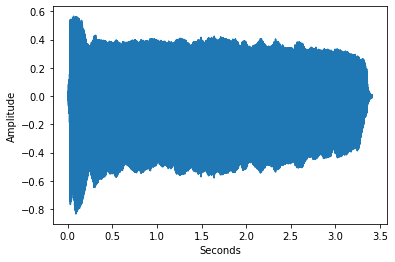

In [189]:
#To plot sound...
#first read the. sound file
(fs,x)=wavread('../sounds/'+oboe_file)
#create a time frame of the sound in seconds (create a list)
t=np.arange(x.size)/float(fs)
#then and the data and time frame to the plot
plt.plot(t,x)
#adding decorations to the plot
plt.title(oboe_file)
plt.xlabel("Seconds")
plt.show()


## Part 3 - Python array indexing

For the function `hop_samples()`, given a numpy array `x`, it should return every Mth element of `x`, starting from the first element. The input arguments to this function are a numpy array `x` and a positive integer `M` such that `M` < number of elements in `x`. The output of this function should be a numpy array.

In [190]:
# E1 - 3.1: Complete the function hop_samples()

def hop_samples(x, M):
    """Return every Mth element of the input array
    
    Args:
        x(np.array): input numpy array
        M(int): hop size (positive integer)
    
    Returns:
        np.array: array containing every Mth element in x, starting from the first element in x
    """
    ### Your code here
    # simply return the spliced version of the array separated by M samples
    return(x[::M])


If you run the function`hop_samples()` with `x = np.arange(10)` and `M = 2` as inputs, it should return: 

```
array([0, 2, 4, 6, 8])
```

In [191]:
# E1 - 3.2: Plot input array, call hop_samples() with proposed input, and plot output array

### Your code here
x = np.arange(10)
M=2
print(hop_samples(x,M))


[0 2 4 6 8]


## Part 4 - Downsampling


One of the required processes to represent an analog signal inside a computer is sampling. The sampling rate is the number of samples obtained in one second when sampling a continuous analog signal to a discrete digital signal. As mentioned we will be working with wav audio files that have a sampling rate of 44100 Hz, which is a typical value. Here you will learn a simple way of changing the original sampling rate of a sound to a lower sampling rate, and will learn the implications it has in the audio quality.

The function `down_sample_audio()` has as input an audio file with a given sampling rate, it should apply downsampling by a factor of `M` and return a down-sampled version of the input samples. The sampling rates and downsampling factors to use have to be integer values.

From the output samples if you need to create a wav audio file from an array, you can use the `wavwrite()` function from the `utilFunctions.py` module. However, in this exercise there is no need to write an audio file, we will be able to hear the sound without creating a file, just playing the array of samples.

In [192]:
# E1 - 4.1: Complete function down_sample_audio()

def down_sample_audio(input_file, M):
    """Downsample by a factor of M the input signal
    
    Args:
        input_file(str): file name of the wav file (including path)
        M(int): downsampling factor (positive integer)
        
    Returns:
        tuple: input samples (np.array), original sampling rate (int), down-sampled signal (np.array), 
               and new sampling rate (int), like: (x, fs, y, fs_new) 
    """
    ### Your code here
    #first we read the file and obtian the rate and data
    (fs_x, x) = wavread(input_file)
    #then we obtain the downsampled data
    y = hop_samples(x,M)
    #we adjust our frequency rate by M
    fs_y = fs_x/M
    # no need to write to a file but here's how we would do it
    #wavwrite(y, fs_y, 'Downsampled_Sound.wav')
    #return the adjusted sample rate and the downsampled data
    return (fs_y, y)

Test cases for `down_sample_audio()`:

_Test Case 1:_ Use the file from the sounds directory `vibraphone-C6.wav` and a downsampling factor of `M=14`.

_Test Case 2:_ Use the  file from the sounds directory `sawtooth-440.wav` and a downsampling factor of `M=14`.

To play the output samples, import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=y, rate=fs_new))`. To visualize the output samples import the `matplotlib.pyplot` package and use `plt.plot(x)`.

You can find some related information in https://en.wikipedia.org/wiki/Downsampling_(signal_processing)

In [194]:
import IPython.display as ipd
import matplotlib.pyplot as plt

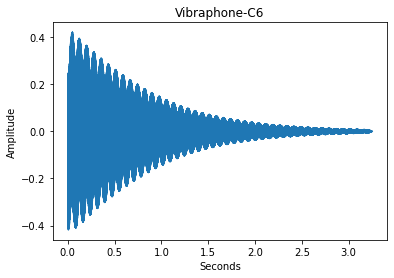

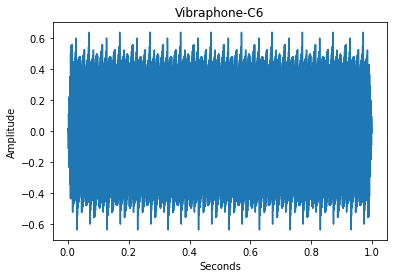

In [195]:
# E1 - 4.2: Plot and play input sounds, call the function down_sample_audio() for the two test cases, 
# and plot and play the output sounds. 

### Your code here

#The code is identical for both test cases:
    #1- M=14
    #2- set the file name to the plot_title var
    #3- set the path name to the test_case var
    #4- obtain the downsampled_audio rate and data with test_case and M
    #5- initialize t to be the time frame of the audio in seconds
    #6- plot the sound (also add labels and titles)
    #7- use ipd.display to hear the sound that is being plotted
    
M=14


#Vibraphone Code

plot_title="vibraphone-C6.wav"
test_case1="../sounds/"+plot_title
(fs_tc1,x_tc1)=down_sample_audio(test_case1, M)
t_tc1=np.arange(x_tc1.size)/float(fs_tc1)
plt.plot(t_tc1,x_tc1)
plt.title("Vibraphone-C6")
plt.xlabel("Seconds")
plt.show()
ipd.display(ipd.Audio(data=x_tc1, rate=fs_tc1))

#Sawtooth Code

plot_title="sawtooth-440.wav"
test_case2="../sounds/"+plot_title
(fs_tc2,x_tc2)=down_sample_audio(test_case2, M)
t_tc2=np.arange(x_tc2.size)/float(fs_tc2)
plt.plot(t_tc2,x_tc2)
plt.title("Vibraphone-C6")
plt.xlabel("Seconds")
plt.show()
ipd.display(ipd.Audio(data=x_tc2, rate=fs_tc2))


In [198]:
# E1 - 4.3: Explain the results of part 4. What happened to the output signals compared to the input ones? 
# Is there a difference between the 2 cases? Why? How could we avoid damaging the signal when downsampling it?

"""
Our downsampling method produces an estimate of the original sequence created with 'wavread',
that would have been obtained by sampling the signal at a lower rate. This means that the output signals were 
formed with fewer samples then the input ones. One could argue that the quality of the sound was decreased.

In the resulting TestCases, Case 1 was diminished in amplitude  over time while Test case 2 stayed consitent. 
In terms of downsampling, no, both sounds were reduced by the same rate.

We could avoid the damage done to the original signal when downsampling by finding the most optimal values 
to produce the same sound without clipping our audio.

"""

'\nWhat happened to the output signals compared to the input ones? \nThe output signals were formed with fewer samples then the input ones, this. was due to down-sampling. \nOne could argue that the quality of the sound was decreased.\n\nIs there a difference between the 2 cases? Why?\nYes! Test case 1 diminished in amplitude while Test case 2 stayed consitent. In terms of downsampling, \nno, both sounds were reduced by the same rate.\n\nHow could we avoid damaging the signal when downsampling it?\nWe could avoid the damage done to the signal by finding the most optimal values \nto produce the same sound without clipping our audio.\n\n\n'